# Data Analysis & Benchmark

In [1]:
library(readr,quietly = TRUE)
library(forecast)
library(ggplot2,quietly=True)
library(forecastHybrid,quietly=True)

# Load data
library(readr)
ds <- read_delim("./data/fulldataset.csv", ";", escape_double = FALSE, col_types = cols(X1 = col_datetime(format = "%Y-%m-%d %H:%M:%S%z")), trim_ws = TRUE)
colnames(ds)[1] <- "time"
ds

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 


Attaching package: ‘forecastHybrid’

The following object is masked from ‘package:forecast’:

    accuracy

Warning message:
“Missing column names filled in: 'X1' [1]”

time,actual,entsoe,bsl_t,brn_t,zrh_t,lug_t,lau_t,gen_t,stg_t,⋯,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2014-12-31 23:00:00,7597,7654,24.69,19.89,21.08,26.77,27.46,30.65,22.22,⋯,0,0,0,0,0,0,0,0,0,1
2015-01-01 00:00:00,7632,7687,23.41,18.96,21.66,26.14,27.26,29.86,22.98,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00,7640,7696,21.45,19.26,21.50,25.75,27.00,29.40,21.82,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00,7391,7448,20.98,18.51,21.42,25.63,26.36,27.28,22.00,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00,7333,7382,20.90,17.26,22.26,24.48,25.75,27.04,22.35,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 04:00:00,7002,7047,21.23,17.61,22.24,26.48,25.03,25.96,21.48,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 05:00:00,7043,7087,21.17,16.99,22.82,25.52,25.10,26.70,21.15,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 06:00:00,6837,6870,22.53,16.68,22.55,25.76,25.53,26.36,20.69,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 07:00:00,6617,6650,23.58,16.07,23.32,25.97,25.41,27.61,20.93,⋯,0,0,0,0,0,0,0,0,0,0
2015-01-01 08:00:00,6560,6593,23.49,17.77,23.64,26.21,25.93,28.38,20.03,⋯,0,0,0,0,0,0,0,0,0,0


[1] 6748.816

[1] 6729

[1] 1160.464

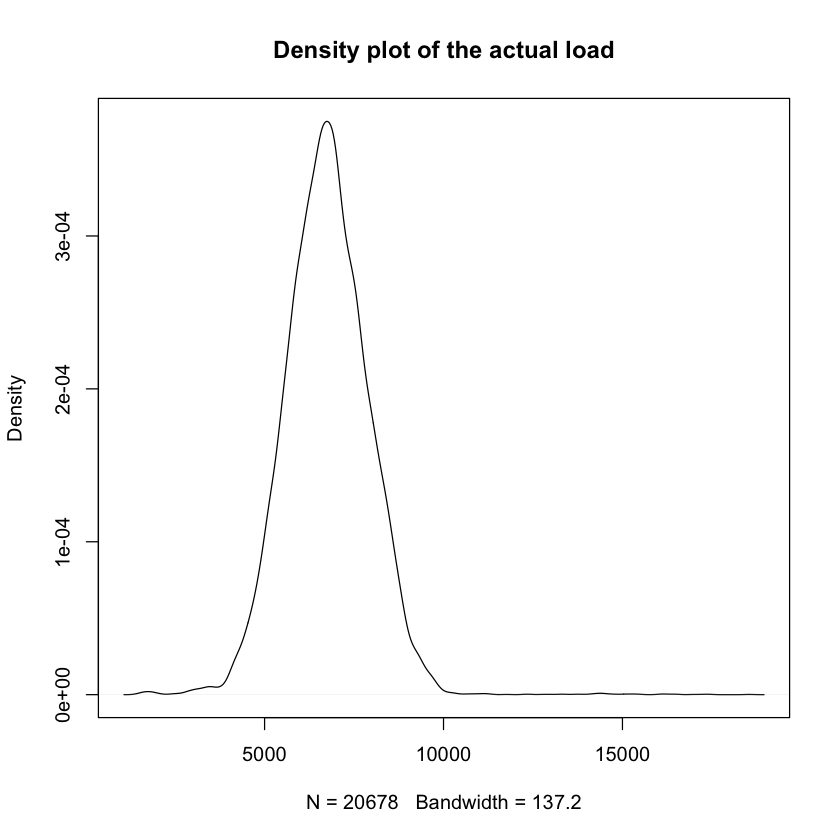

In [8]:
actual = na.omit(ds$actual)
plot(density(actual), main='"Density plot of the actual load"')
mean(actual)
median(actual)
sd(actual)

[1] 384.4663

[1] 329

[1] 762.2428

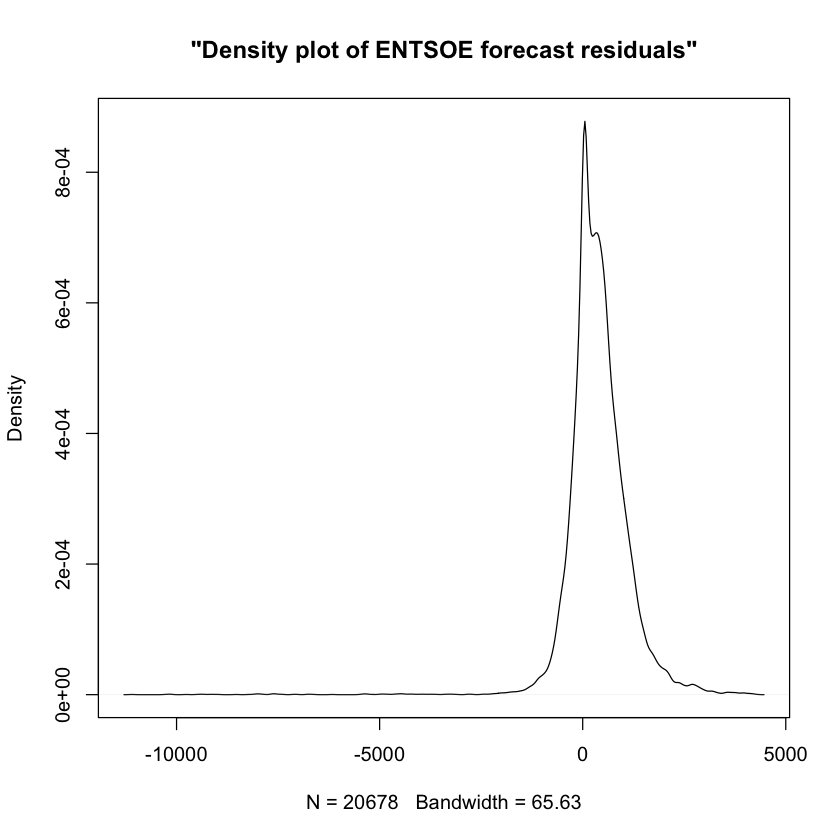

In [11]:
residuals = ds$entsoe[0:length(actual)] - actual
plot(density(residuals), main='"Density plot of ENTSOE forecast residuals"')
mean(residuals)
median(residuals)
sd(residuals)

In [22]:
trainset <- subset(ds, time <= '2017-02-01')
# If we take the full sample, we get divergent forecasts
trainset <- subset(trainset, time > '2015-08-01')
testset <- subset(ds, time > '2017-02-01')

load <- na.omit(trainset$actual)
load <- msts(load, seasonal.periods = c(24,168,8766))

In [23]:
fit <- tbats(load)

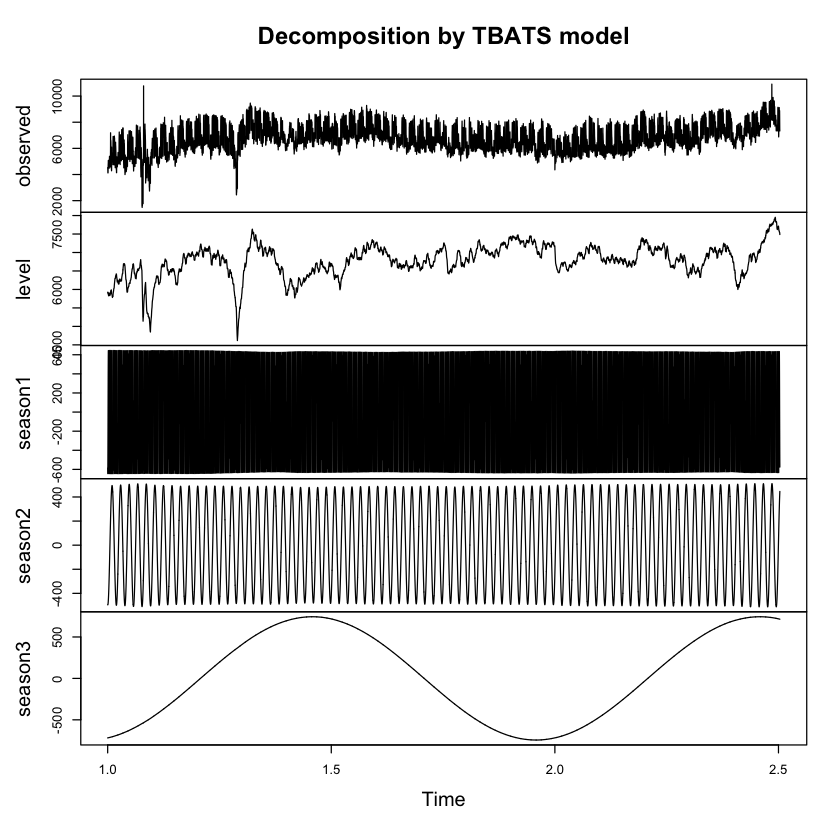

In [24]:
plot(fit)

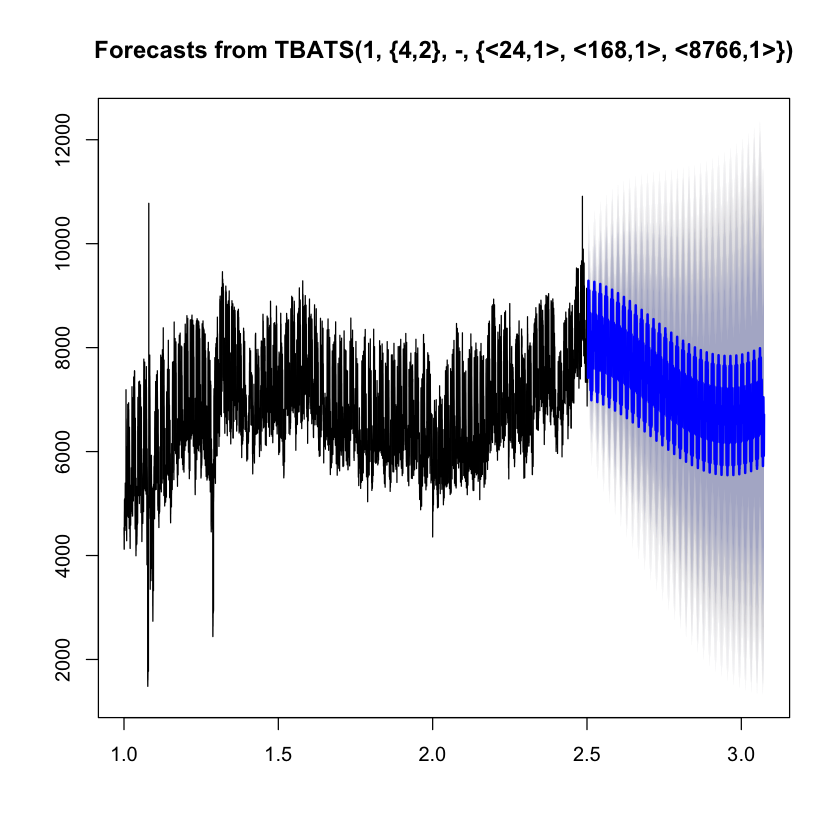

In [25]:
plot(forecast(fit, h=5000))

In [13]:
fc_mean <- fc[["mean"]]
write.csv(fc_mean, "/Users/david/AnacondaProjects/lstm-load-forecasting/data/tbats_forecast_01022017-h5000.csv")

TBATS(1, {0,0}, 0.813, {<24,10>, <168,6>, <8766,1>})

Call: tbats(y = load)

Parameters
  Alpha: 1.098002
  Beta: -0.1179614
  Damping Parameter: 0.812931
  Gamma-1 Values: 9.743924e-06 0.008631057 -0.01233402
  Gamma-2 Values: 5.579269e-05 0.008334912 -0.005076331

Seed States:
              [,1]
 [1,] 17334.047305
 [2,]  -335.479234
 [3,]  -584.043306
 [4,]    51.531928
 [5,]    -9.515652
 [6,]   -37.605756
 [7,]     2.530062
 [8,]    -2.137740
 [9,]    -5.725243
[10,]    -7.738685
[11,]    12.018766
[12,]   -10.458655
[13,]  -282.576854
[14,]  -222.934952
[15,]    99.588773
[16,]    41.638145
[17,]   -18.194915
[18,]   -34.091703
[19,]    10.522782
[20,]    -9.879681
[21,]     5.934217
[22,]    -4.196002
[23,]   -77.323112
[24,]    85.350796
[25,]    53.497903
[26,]   -59.190471
[27,]   -37.243073
[28,]    46.324965
[29,]  -445.827795
[30,]  -115.376960
[31,]     8.425780
[32,]   -11.991015
[33,]   -75.488873
[34,]  -142.310408
[35,] -9108.940477
[36,] 26192.233608

Sigma: 234.2306
